### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [3]:
library(ggplot2)

In [4]:
# Added list of other instances that should be marked as 'NA' 
# since some instances were just empty strings or a single space

ny = read.csv('new_york_city.csv', na = c("", "N/A", "NA", " ")) 
wash = read.csv('washington.csv', na = c("", "N/A", "NA", " "))
chi = read.csv('chicago.csv', na = c("", "N/A", "NA", " "))

### A little investigation of the data

In [5]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [6]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [7]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [20]:
# looking at Trip Duration by User Type 
by(chi$Trip.Duration, chi$User.Type, mean)

chi$User.Type: Customer
[1] 1929.977
------------------------------------------------------------ 
chi$User.Type: Subscriber
[1] 685.027

In [25]:
by(ny$Trip.Duration/60, ny$User.Type, mean)

ny$User.Type: Customer
[1] 36.55127
------------------------------------------------------------ 
ny$User.Type: Subscriber
[1] 12.58972

In [26]:
by(wash$Trip.Duration/60, wash$User.Type, mean)

wash$User.Type: Customer
[1] 43.90715
------------------------------------------------------------ 
wash$User.Type: Subscriber
[1] 12.2221

### Question 1:  Furthest Travelling Age Group 


**How far did people of different ages travel? Is there a correlation?**

In [27]:
ny_chi=rbind(ny,chi) # Combine data from two cities

In [33]:
# Explore the data 

print("User Age Info")
summary(2020-ny$Birth.Year) # New York
summary(2020-chi$Birth.Year) # Chicago
summary(2020-ny_chi$Birth.Year) # Combined


# Info on user's main trip duration
# A noticable outlier can be seen in "Max"
print("Trip Duration")
summary(ny_chi$Trip.Duration)

[1] "User Age Info"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  19.00   32.00   39.00   41.79   50.00  135.00    5218 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   18.0    31.0    36.0    39.1    45.0   121.0    1747 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   32.00   39.00   41.46   50.00  135.00    6965 

[1] "Trip Duration"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     60.0     371.0     617.0     908.2    1060.0 1088634.0         1 

Warning message:
“Removed 7351 rows containing non-finite values (stat_summary).”Warning message:
“Removed 7393 rows containing missing values (geom_point).”

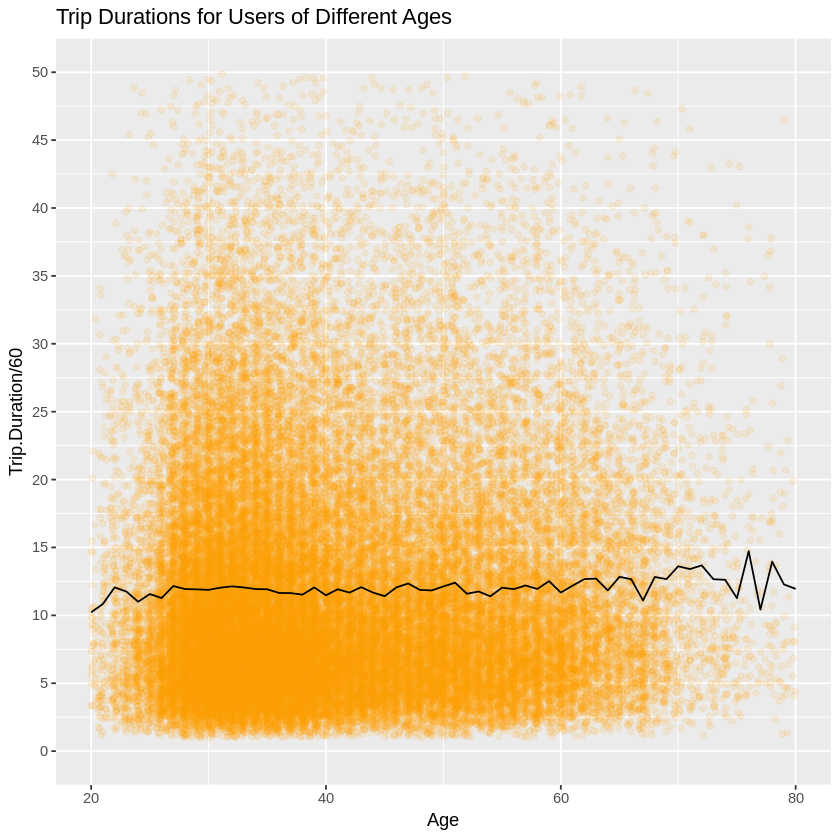

In [34]:
# Duration in seconds split by 60 to get minutes
# 2020 - Age to get current age (could be aother year, but I chose to go with 2020)

ggplot(aes(x=2020-Birth.Year, y=Trip.Duration/60), data = ny_chi) + 
geom_jitter(alpha=1/10, color = 'orange') + 
scale_y_continuous(limit=c(0,50), breaks=seq(0,50, by=5)) + 
scale_x_continuous(limit=c(20, 80), breaks=seq(20,80,by=20)) +
labs(x = 'Age') +
geom_line(stat = 'summary', fun.y=mean, color='black') +
ggtitle("Trip Durations for Users of Different Ages")

####  Furthest Travelling Age Group 

#### Data: For Chicago and New York Only

Since the most dense part of the scatterplot was the bottom left, it's obvious that younger people (aged 20 to 40) tend to mostly make shorter trips, but sometimes very long trips as seen by the faint outliers on the top left. Overall, users of all ages tend to use the bikes for the same range of about 10 to 15 minutes per trip. Older users tend to take slightly longer trips closer to the 15 minute range.


### Question 2: Most Popular Trips

**What are the top 10 most popular trips taken?**

In [35]:
# Dropping the last two columns from the New York and Chicago Datasets
ny = subset(ny, select=-c(Gender,Birth.Year)) 
chi = subset(chi, select=-c(Gender,Birth.Year))
comb = rbind(ny,chi,wash) # combine all three datasets

In [36]:
# Creating a new column that combines start station with end startion to create a unique "trip"
comb$Trip.Taken <- factor(paste(comb$Start.Station, comb$End.Station, sep=" > "))

In [38]:
# Creating a new dataframe that counts the frequency of each unique trip
trip_freq <- aggregate(data.frame(count = comb$Trip.Taken), list(value=comb$Trip.Taken), length)
trip_freq <- trip_freq[with(trip_freq, order(-trip_freq$count)),]

In [39]:
# A function that generates a new dataframe for data for the top n
# This number can only be up to 26 (alphabet)
# That's okay because we want to keep it small here

top_n_trip_freq <-function(n) 
{ 
    if (n>26|n<1) { print("Number must be between 1 and 26") 
                   
    } else {top_n_trips <- head(trip_freq, n)
        top_n_trips <- cbind(top_n_trips, Trip_ID = c(paste("Trip ", LETTERS[1:n], sep="")))}
}

# Since we want the top 10, we run the function with n=10
top_n_trips <- top_n_trip_freq(10)

$title
[1] "Top 10 Most Popular Trips "

attr(,"class")
[1] "labels"

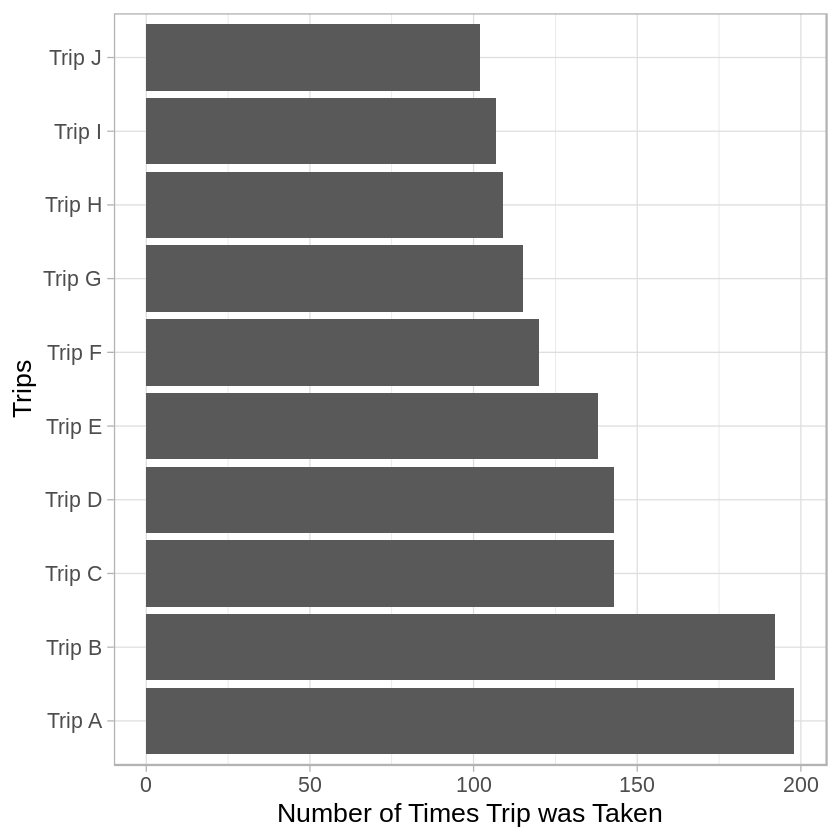

In [40]:
ggplot(top_n_trips, aes(x=Trip_ID, y=count)) + geom_bar(stat='identity') +
coord_flip() +
theme_light(base_size = 16) +
labs(x='Trips') +
labs(y='Number of Times Trip was Taken')
ggtitle("Top 10 Most Popular Trips ")

In [41]:
# Reference for trips
print("Reference Point for Trips (Start and End Stations)")
top_n_trips


[1] "Reference Point for Trips (Start and End Stations)"


,value,count,Trip_ID
42004,Jefferson Dr & 14th St SW > Jefferson Dr & 14th St SW,198,Trip A
55118,Smithsonian-National Mall / Jefferson Dr & 12th St SW > Smithsonian-National Mall / Jefferson Dr & 12th St SW,192,Trip B
45177,Lincoln Memorial > Jefferson Dr & 14th St SW,143,Trip C
45178,Lincoln Memorial > Jefferson Memorial,143,Trip D
42008,Jefferson Dr & 14th St SW > Lincoln Memorial,138,Trip E
45182,Lincoln Memorial > Lincoln Memorial,120,Trip F
42164,Jefferson Memorial > Lincoln Memorial,115,Trip G
17428,8th & F St NE > Columbus Circle / Union Station,109,Trip H
27739,Columbus Circle / Union Station > 8th & F St NE,107,Trip I
14456,4th St & Madison Dr NW > 4th St & Madison Dr NW,102,Trip J


#### Data: A combination of all three cities

#### Most Popular Trips

The top 2 most popular trips are actually round trips that both start and end at the same destination. For example, Trip A starts and ends at Jefferson Dr & 14th St SW. The same is true for Trip B, Trip F, and Trip J. It is also clear that many trips end at important landmarks, such as the Lincolm Memorial, the Jefferson Memorial, or the Columbus Circle. This shows that the company made a good decision by allowing users to return bikes at any station, including the start station. It's also good that many of their stations are adjacent to popular landmarks. 


### Question 3: Popular Travel Seasons

**What are the most common months for traveling? When did different types of Users Travel the most?**

In [42]:
# Extract Month name regardless of day or year
comb$Month <- month.name[as.numeric(substring(comb$Start.Time, 6,7))]

In [44]:
# Remove NA entries from User Type
comb = subset(comb, !is.na(User.Type))
# Checking data for User Types
summary(comb$User.Type)

Customer Subscriber 
     30754     121576

In [45]:
# Taking a look at total trip durations during different months
# We notice missing data for many months. 
by(comb$Trip.Duration/60, comb$Month, sum)

comb$Month: April
[1] 632792.9
------------------------------------------------------------ 
comb$Month: February
[1] 294612.4
------------------------------------------------------------ 
comb$Month: January
[1] 207805.9
------------------------------------------------------------ 
comb$Month: June
[1] 763216
------------------------------------------------------------ 
comb$Month: March
[1] 302869.7
------------------------------------------------------------ 
comb$Month: May
[1] 586060.7

In [46]:
# to order the x-axis cronologically by month
comb$Month <- factor(comb$Month, levels=month.name)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

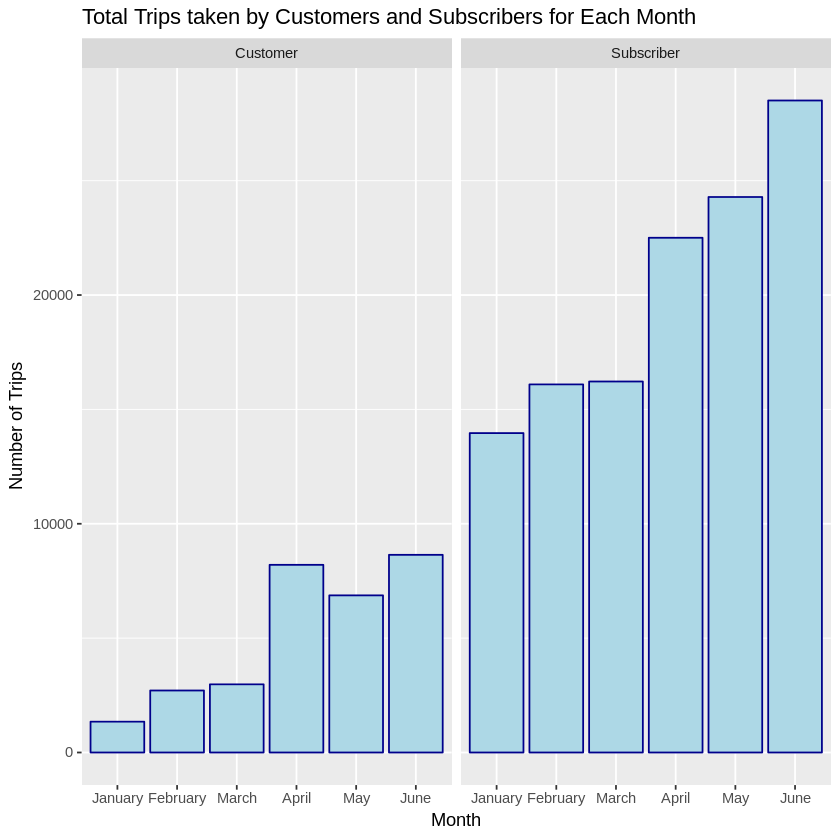

In [49]:
ggplot(aes(x=Month), data=comb) +
geom_histogram(stat='count', color='dark blue', fill='light blue') +
facet_wrap(~ User.Type) +
labs(x = 'Month', y = 'Number of Trips') +
ggtitle("Total Trips taken by Customers and Subscribers for Each Month")

Warning message:
“Removed 306 rows containing missing values (geom_point).”

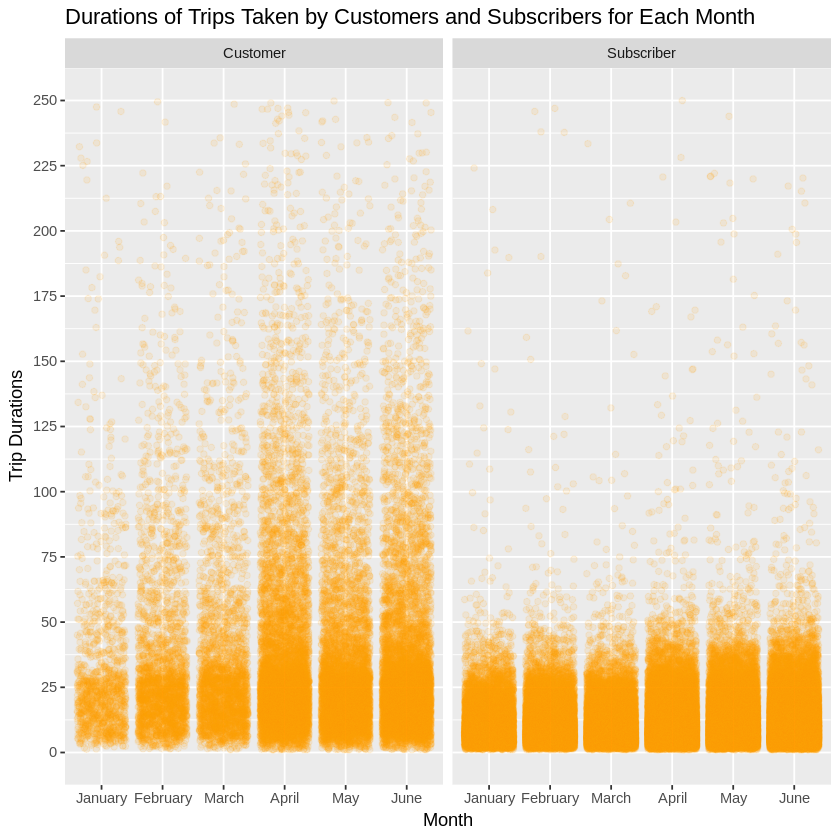

In [51]:
ggplot(data=comb, aes(x = comb$Month, y=comb$Trip.Duration/60)) +
geom_jitter(alpha=1/10, color = 'orange') +
scale_y_continuous(limit=c(0,250), breaks=seq(0,250, by=25)) +
facet_wrap(~ User.Type) +
labs(x = 'Month', y = 'Trip Durations') +
ggtitle("Durations of Trips Taken by Customers and Subscribers for Each Month")

### Popular Travel Seasons

#### Data: A combination of all three cities

#### Total trips made:

The histogram, split by User Type (either Subscriber or Customer) shows that most trips happen in Spring. Subscribers tend to use the service the most during April, May, and June (a trend similar to Customers, with over 20,000 trips for each month). However, use of Subscribers is clearly heavier with a visible spike in June.

#### Duration of trips:

The Scatter Plot Diagram for Trip shows that Customers tend to take fewer but longer trips in the three months mentioned earlier despite taking fewer trips overall. Despite the spike in trips taken by Subscribers, the duration rarely exceeds an 60 minutes, suggesting that subscribers are more consistent with their use of this service.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [52]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')